<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/%D0%9A%D0%BE%D0%BB%D0%B8%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%BE_%D1%87%D0%B0%D1%81%D1%82%D0%B5%D0%B9_%D1%80%D0%B5%D1%87%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk
!python -m nltk.downloader punkt
!python -m nltk.downloader averaged_perceptron_tagger_ru

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_ru.zip.


<ipython-input-5-75f2ac220dd3>:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_colors)


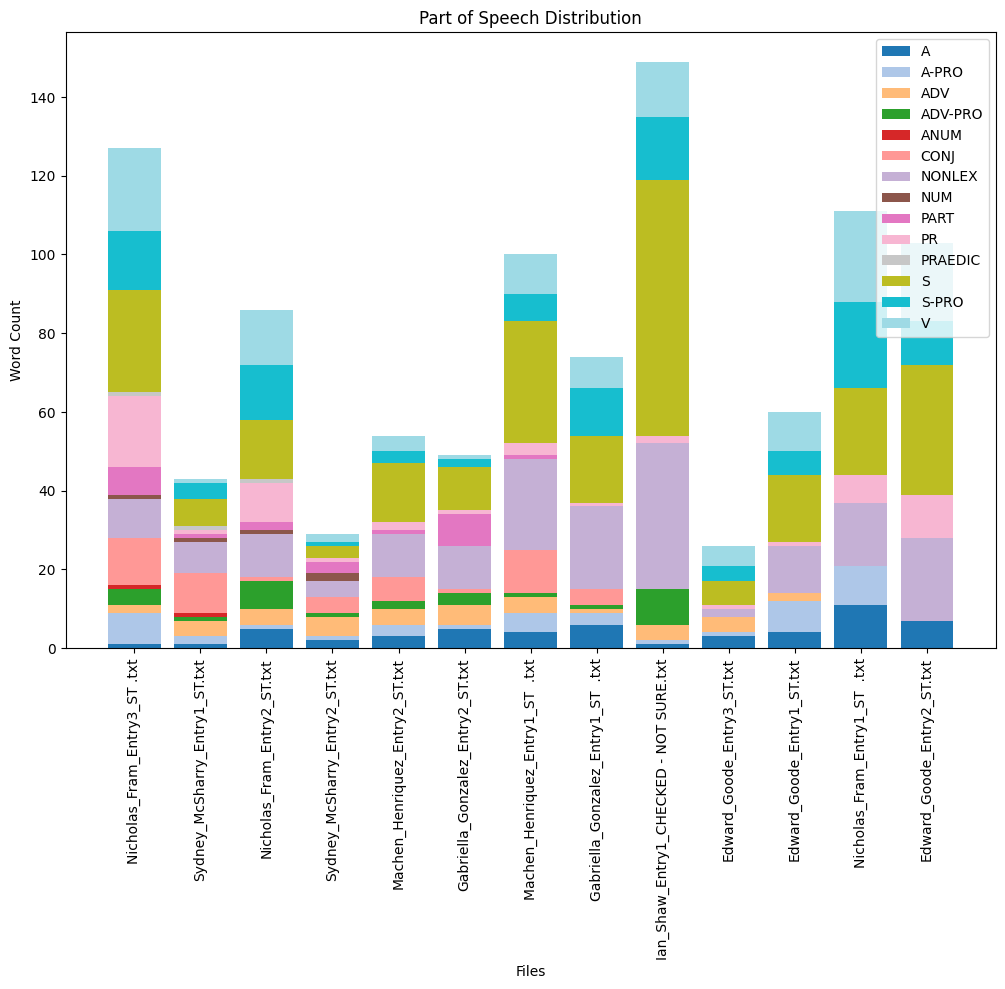

In [5]:
import os
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from itertools import zip_longest

# Set the path to the directory containing the text files
directory = "/content/Students_texts"

# Initialize a Counter to store the counts of parts of speech for each file
pos_counts = {}

# Regular expression pattern to match tags and [unclear]
pattern = re.compile(r'<[^>]+>|(\[unclear\])')

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        filepath = os.path.join(directory, filename)

        # Read the contents of the file
        with open(filepath, "r", encoding="utf-8") as file:
            text = file.read()

        # Remove tags and [unclear] from the text
        cleaned_text = re.sub(pattern, '', text)

        # Tokenize the cleaned text into words
        words = word_tokenize(cleaned_text, language='russian')

        # Count the total number of words in the file
        total_words = len(words)

        # Perform part-of-speech tagging
        pos_tags = nltk.pos_tag(words, lang='rus')

        # Count the occurrences of each part of speech
        pos_counts[filename] = Counter(tag.split('=')[0] for word, tag in pos_tags)

# Prepare data for the stacked bar chart
labels = list(pos_counts.keys())
pos_names = set()
data = defaultdict(list)

for filename, pos_count in pos_counts.items():
    for pos, count in pos_count.items():
        pos_names.add(pos)
        data[pos].append(count)

# Fill in missing values with zeros
for pos in pos_names:
    if pos not in data:
        data[pos] = [0] * len(labels)

# Plot the stacked bar chart
plt.figure(figsize=(12, 8))
bottom = [0] * len(labels)
pos_names = sorted(pos_names)
num_colors = len(pos_names)
colors = plt.cm.get_cmap('tab20', num_colors)

# Prepare a dictionary to store counts for each file
file_counts = {filename: [data[pos][i] if i < len(data[pos]) else 0 for pos in pos_names] for i, filename in enumerate(labels)}

for i, pos in enumerate(pos_names):
    counts = [file_counts[filename][i] for filename in labels]
    plt.bar(labels, counts, bottom=bottom, label=pos, color=colors(i % num_colors))
    bottom = [sum(x) for x in zip(bottom, counts)]

plt.xlabel("Files")
plt.ylabel("Word Count")
plt.title("Part of Speech Distribution")
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.show()